<a href="https://colab.research.google.com/github/graumannm/Berlin_Bike_CV/blob/main/s02_elbow_4_kmedoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use elbow method to determine the number of cluster to look at

# Setup

In [2]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [4]:
drive.mount('/gdrive')

Mounted at /gdrive


In [11]:
# define file name (feature vector extractor)
fex = 'dinoS14_bikelanes'
data_dir  = '/gdrive/My Drive/berlin_bike_CV/final_project_first_images/'

In [8]:
# load pickled file from gdrive

# Path to the pickle file
file_path = data_dir + fex + "_embeddings.pickle"

# Load the dictionary from the pickle file
with open(file_path, "rb") as myfile:
    img_embedding_dict = pickle.load(myfile)

In [9]:
# sort embeddings for convenience
X = []
images = []

for image, embedding in img_embedding_dict.items():

    X.append(embedding) # embedding matrix
    images.append(image) # file name

# Find optimal cluster size using elbow method

We look for an inflexion point ('elbow') using distortion and inertia.

In [12]:
# Loop through different cluster sizes to find the best cluster size

# convert embeddings list to np array
X = np.array(X)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 25, 1)

for k in K:

    # Building and fitting the model
    kmedoidModel = KMedoids(n_clusters=k, random_state=0, init='k-medoids++').fit(X)

    distortions.append(sum(np.min(cdist(X, kmedoidModel.cluster_centers_, 'cosine'),axis=1)) / X.shape[0])
    inertias.append(kmedoidModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmedoidModel.cluster_centers_, 'cosine'),axis=1)) / X.shape[0]
    mapping2[k] = kmedoidModel.inertia_

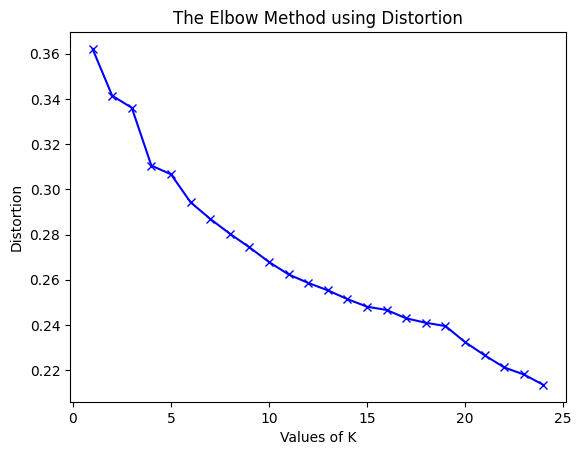

In [13]:
# plot distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

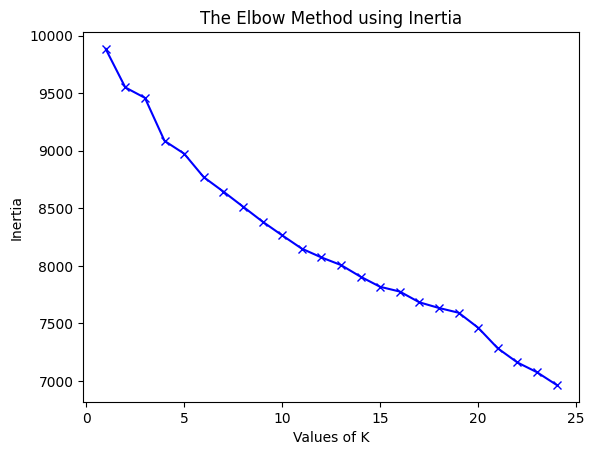

In [15]:
# plot inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### These suggest a cluster size of k=2 or k=4